# Supervised sentiment analyses based on movie reviews
## Based on 50,000 labeled IMDb movie reviews [dataset](http://ai.stanford.edu/~amaas/data/sentiment/)

# Import necessary dependencies

In [1]:
import pandas as pd
import numpy as np

# Python files with functions
import text_normalizer as tn
import model_evaluation_utils as meu
# ~Python files

np.set_printoptions(precision=2, linewidth=80)

# Load, split (train, test) and normalize the data

In [4]:
# Use subset of the data for better performance
train_size = 300
test_size = 1000

In [10]:
dataset = pd.read_csv('movie_reviews.csv').sample(frac=1).reset_index(
    drop=True)

reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

# train sets
train_reviews = reviews[:train_size]
train_sentiments = sentiments[:train_size]

# test sets
test_reviews = reviews[train_size:train_size + test_size]
test_sentiments = sentiments[train_size:train_size + test_size]

# normalized reviews
norm_train_reviews = tn.normalize_corpus(train_reviews)
norm_test_reviews = tn.normalize_corpus(test_reviews)

# peek at data
print(dataset.head(1))

                                              review sentiment
0  I'm not really much of an Abbott & Costello fa...  negative


# Traditional supervised machine learning methods

## Feature engineering

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build bag of words (bow) features on train reviews
cv = CountVectorizer(min_df=0., max_df=1., ngram_range=(1, 2))
cv_train_features = cv.fit_transform(norm_train_reviews)

# build tfidf features on train reviews
tv = TfidfVectorizer(
    min_df=0., max_df=1., ngram_range=(1, 2), sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [18]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [25]:
print('BOW model: train features shape - {}, test features shape - {}'.format(
    cv_train_features.shape, cv_test_features.shape))

print(
    'TFIDF model: train features shape - {}, test features shape - {}'.format(
        tv_train_features.shape, tv_test_features.shape))

BOW model: train features shape - (300, 39956), test features shape - (1000, 39956)
TFIDF model: train features shape - (300, 39956), test features shape - (1000, 39956)


## Recommendation about models to choose for classification
+ logistic regression
+ SVM
+ multinomial Naive Bayes

# Model training, prediction and performance evaluation

## Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=100)

### Logistic regression on BOW features

In [45]:
lr_bow_predictions = meu.train_predict_model(
    classifier=lr,
    train_features=cv_train_features,
    train_labels=train_sentiments,
    test_features=cv_test_features,
    test_labels=test_sentiments)

meu.display_model_performance_metrics(
    true_labels=test_sentiments,
    predicted_labels=lr_bow_predictions,
    classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.765
Precision: 0.7783
Recall: 0.765
F1 Score: 0.7633

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.84      0.67      0.75       517
   negative       0.71      0.86      0.78       483

avg / total       0.78      0.77      0.76      1000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        348      169
        negative         66      417


### Logistic regression on TFIDF features

In [48]:
lr_tfidf_predictions = meu.train_predict_model(
    classifier=lr,
    train_features=tv_train_features,
    train_labels=train_sentiments,
    test_features=tv_test_features,
    test_labels=test_sentiments)

meu.display_model_performance_metrics(
    true_labels=test_sentiments,
    predicted_labels=lr_tfidf_predictions,
    classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.635
Precision: 0.7737
Recall: 0.635
F1 Score: 0.5892

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.96      0.31      0.46       517
   negative       0.57      0.99      0.72       483

avg / total       0.77      0.64      0.59      1000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        158      359
        negative          6      477


# SVM

In [50]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge', max_iter=100)

### SVM on BOW features

In [51]:
svm_bow_predictions = meu.train_predict_model(
    classifier=svm,
    train_features=cv_train_features,
    train_labels=train_sentiments,
    test_features=cv_test_features,
    test_labels=test_sentiments)

meu.display_model_performance_metrics(
    true_labels=test_sentiments,
    predicted_labels=svm_bow_predictions,
    classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.755
Precision: 0.7554
Recall: 0.755
F1 Score: 0.7551

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.77      0.75      0.76       517
   negative       0.74      0.76      0.75       483

avg / total       0.76      0.76      0.76      1000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        388      129
        negative        116      367


### SVM on TFIDF features

In [52]:
svm_tfidf_predictions = meu.train_predict_model(
    classifier=svm,
    train_features=tv_train_features,
    train_labels=train_sentiments,
    test_features=tv_test_features,
    test_labels=test_sentiments)

meu.display_model_performance_metrics(
    true_labels=test_sentiments,
    predicted_labels=svm_tfidf_predictions,
    classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.792
Precision: 0.806
Recall: 0.792
F1 Score: 0.7906

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.87      0.70      0.78       517
   negative       0.74      0.89      0.81       483

avg / total       0.81      0.79      0.79      1000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        362      155
        negative         53      430


# Multinomial Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

### Multinomial Naive Bayes on BOW features

In [54]:
mnb_bow_predictions = meu.train_predict_model(
    classifier=mnb,
    train_features=cv_train_features,
    train_labels=train_sentiments,
    test_features=cv_test_features,
    test_labels=test_sentiments)

meu.display_model_performance_metrics(
    true_labels=test_sentiments,
    predicted_labels=mnb_bow_predictions,
    classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.739
Precision: 0.7878
Recall: 0.739
F1 Score: 0.73

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.91      0.55      0.69       517
   negative       0.66      0.94      0.78       483

avg / total       0.79      0.74      0.73      1000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        286      231
        negative         30      453


### Multinomial Naive Bayes on TFIDF features

In [55]:
mnb_tfidf_predictions = meu.train_predict_model(
    classifier=mnb,
    train_features=tv_train_features,
    train_labels=train_sentiments,
    test_features=tv_test_features,
    test_labels=test_sentiments)

meu.display_model_performance_metrics(
    true_labels=test_sentiments,
    predicted_labels=mnb_tfidf_predictions,
    classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.561
Precision: 0.7636
Recall: 0.561
F1 Score: 0.4687

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.99      0.15      0.26       517
   negative       0.52      1.00      0.69       483

avg / total       0.76      0.56      0.47      1000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive         79      438
        negative          1      482


# Newer supervised deep learning models

In [60]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
keras.backend.backend()

'tensorflow'

## Prediction class label encoding

In [64]:
le = LabelEncoder()
num_classes = 2

# tokenize train reviews and encode train labels
tokenized_train = [tn.tokenizer.tokenize(text) for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)  # one-hot encoding

# tokenize test reviews and encode test labels
tokenized_test = [tn.tokenizer.tokenize(text) for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [77]:
print('Sentiment class label map: ',
      dict(zip(le.classes_, le.transform(le.classes_))))
print('-' * 60)
print('Sample test label transformation: ')
print('Actual values: ', test_sentiments[:3])
print('Encoded values: ', y_ts[:3])
print('One hot encoded values: \n', y_test[:3])

Sentiment class label map:  {'negative': 0, 'positive': 1}
------------------------------------------------------------
Sample test label transformation: 
Actual values:  ['positive' 'positive' 'negative']
Encoded values:  [1 1 0]
One hot encoded values: 
 [[0. 1.]
 [0. 1.]
 [1. 0.]]


# Feature engineering with word embeddings

In [79]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(
    tokenized_train,
    size=w2v_num_features,
    window=150,
    min_count=10,
    sample=1e-3)

### Function for generating averaged vectors of all words in reviews 

In [147]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features, ), dtype='float64')
        nwords = 0.

        for word in words:
            if word in vocabulary:
                feature_vector = np.add(feature_vector, model[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)
        return feature_vector

    features = [
        average_word_vectors(words, model, vocabulary, num_features)
        for words in corpus
    ]
    return np.array(features)

In [148]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(
    corpus=tokenized_train, model=w2v_model, num_features=w2v_num_features)
avg_wv_test_features = averaged_word2vec_vectorizer(
    corpus=tokenized_test, model=w2v_model, num_features=w2v_num_features)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [104]:
# feature engineering with GloVe model
train_nlp = [tn.nlp(text) for text in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [tn.nlp(text) for text in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [105]:
print('Word2vec model: train shape - {}, test shape - {}'.format(avg_wv_train_features.shape,avg_wv_test_features.shape))
print('GloVe model: train shape - {}, test shape - {}'.format(train_glove_features.shape,test_glove_features.shape))

Word2vec model: train shape - (300, 500), test shape - (1000, 500)
GloVe model: train shape - (300, 384), test shape - (1000, 384)


# Modeling with deep neural networks

## Building deep neural network architecture

In [115]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(
        Dense(512, activation='relu', input_shape=(num_input_features, )))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
    return dnn_model

### Model training, prediction and performance evaluation based of word2vec features

In [144]:
w2v_dnn = construct_deepnn_architecture(w2v_num_features)

### Visualize sample deep architecture

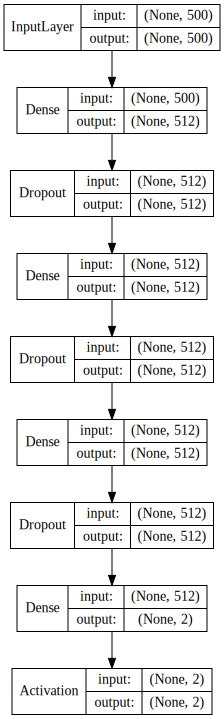

In [145]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(
    model_to_dot(
        w2v_dnn, show_shapes=True, show_layer_names=False,
        rankdir='TB').create(prog='dot', format='svg'))

In [146]:
batch_size = 30
w2v_dnn.fit(
    x=avg_wv_train_features,
    y=y_train,
    epochs=5,
    batch_size=batch_size,
    verbose=True,
    shuffle=True,
    validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/5
270/270 [==============================] - ETA: 4s - loss: 3.6661 - acc: 0.400 - ETA: 1s - loss: 6.2007 - acc: 0.477 - ETA: 0s - loss: 6.4068 - acc: 0.520 - ETA: 0s - loss: 6.9556 - acc: 0.509 - 1s 3ms/step - loss: 7.0728 - acc: 0.5148 - val_loss: 6.9084 - val_acc: 0.5667
Epoch 2/5
270/270 [==============================] - ETA: 0s - loss: 6.4472 - acc: 0.600 - ETA: 0s - loss: 7.2682 - acc: 0.541 - ETA: 0s - loss: 6.9102 - acc: 0.505 - 0s 795us/step - loss: 5.8020 - acc: 0.4926 - val_loss: 8.4046 - val_acc: 0.4333
Epoch 3/5
270/270 [==============================] - ETA: 0s - loss: 4.9373 - acc: 0.500 - ETA: 0s - loss: 5.2773 - acc: 0.500 - ETA: 0s - loss: 6.2365 - acc: 0.494 - 0s 835us/step - loss: 6.3067 - acc: 0.5296 - val_loss: 6.9845 - val_acc: 0.5667
Epoch 4/5
270/270 [==============================] - ETA: 0s - loss: 7.5218 - acc: 0.533 - ETA: 0s - loss: 8.0590 - acc: 0.500 - ETA: 0s - loss: 7.7012 - acc: 0.522 - ETA: 0s - l

In [135]:
y_pred = w2n_dnn.predict_classes(avg_wv_test_features)
predictions = le.inverse_transform(y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [137]:
meu.display_model_performance_metrics(test_sentiments,predictions,classes=['positive','negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.483


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.2333
Recall: 0.483


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score: 0.3146

Model Classification report:
------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

   positive       0.00      0.00      0.00       517
   negative       0.48      1.00      0.65       483

avg / total       0.23      0.48      0.31      1000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive          0      517
        negative          0      483


### Model training, prediction and performance evaluation based of GloVe features

In [138]:
glove_dnn = construct_deepnn_architecture(train_glove_features.shape[1])

In [140]:
batch_size = 30
glove_dnn.fit(
    x=train_glove_features,
    y=y_train,
    epochs=5,
    batch_size=batch_size,
    verbose=True,
    shuffle=True,
    validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/5
270/270 [==============================] - ETA: 4s - loss: 0.7579 - acc: 0.433 - ETA: 1s - loss: 0.8959 - acc: 0.466 - ETA: 0s - loss: 0.8369 - acc: 0.446 - ETA: 0s - loss: 0.7835 - acc: 0.495 - 1s 3ms/step - loss: 0.7828 - acc: 0.4963 - val_loss: 0.6552 - val_acc: 0.7000
Epoch 2/5
270/270 [==============================] - ETA: 0s - loss: 0.7431 - acc: 0.366 - ETA: 0s - loss: 0.7045 - acc: 0.491 - ETA: 0s - loss: 0.7209 - acc: 0.483 - 0s 795us/step - loss: 0.7150 - acc: 0.4889 - val_loss: 0.6975 - val_acc: 0.4667
Epoch 3/5
270/270 [==============================] - ETA: 0s - loss: 0.7117 - acc: 0.600 - ETA: 0s - loss: 0.7274 - acc: 0.555 - ETA: 0s - loss: 0.7141 - acc: 0.550 - 0s 791us/step - loss: 0.7063 - acc: 0.5370 - val_loss: 0.6410 - val_acc: 0.7000
Epoch 4/5
270/270 [==============================] - ETA: 0s - loss: 0.6621 - acc: 0.633 - ETA: 0s - loss: 0.6837 - acc: 0.591 - ETA: 0s - loss: 0.6847 - acc: 0.571 - 0s 778us/st

In [153]:
y_pred = glove_dnn.predict_classes(test_glove_features)
glove_predictions = le.inverse_transform(y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [155]:
meu.display_model_performance_metrics(test_sentiments,glove_predictions,classes=['positive','negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.542
Precision: 0.6548
Recall: 0.542
F1 Score: 0.4578

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.79      0.16      0.26       517
   negative       0.51      0.95      0.67       483

avg / total       0.65      0.54      0.46      1000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive         81      436
        negative         22      461
